# <center> Pandas

`pandas` – это основная библиотека Python для работы с табличными и структурированными данными, которая предоставляет удобные инструменты для их обработки и анализа.

### Зачем нужен Pandas?

* Работа с данными в виде таблиц – удобная замена Excel и SQL для работы с данными в Python.
* Чтение и запись файлов – поддерживает CSV, Excel, JSON, SQL и другие форматы.
* Быстрая обработка данных – мощные инструменты для фильтрации, сортировки, группировки и агрегирования данных.
* Работа с пропущенными значениями – простое обнаружение, удаление и заполнение NaN.
* Гибкая индексация – удобный доступ к данным через loc, iloc.
* Интеграция с другими библиотеками – совместим с __NumPy, Matplotlib, Scikit-learn__.
* Визуализация данных – встроенные функции построения графиков.


Многие биологические данные можно представить в табличном виде. Например, измерения параметров у группы людей:




<style>
    table {margin-left: 0 !important;}
</style>

|       | Вес (кг) | Рост (см) | Возраст | Курит |
|------|---------|---------|--------|------|
| __Даша__ | 70      | 175     | 30     | Нет  |
| __Петя__ | 80      | 180     | 45     | Да   |
| __Леша__ | 60      | 165     | 25     | Нет  |
| __Света__ | 90      | 185     | 50     | Да   |




Данные в табличном виде также принято называть __дата фрейм (data frame)__. Обычно в датафрейме строки (__rows__) - это отдельные объекты, а колонки (__columns__) – это параметры наблюдений. 

Официальную документацию по pandas можно найти [здесь](https://pandas.pydata.org/), полезная бесплатная книга от создателя pandas – [клац](https://wesmckinney.com/book/).


Для того, чтобы начать работать с pandas, вам необходимо его скачать, самый простой способ с помощью менеджера пакетов для python – __pip__:


Напишите в терминале (для окружения, в которое хотите установить pandas) `pip install pandas`

Если pandas установлен корректно, теперь вы можете подгрузить его в скрипт: 


In [1]:
import pandas as pd

Такой способ импорта является общепринятым, но опциональным (можете назвать хоть np, plt, панда), e.g. __import pandas as панда__ будет также работать. 

## I) Способы создания DataFrame

###  Создание из словаря (dict): 

Давайте создадим первый датафрейм. 


Очень просто создавать вручную датафрейм из структуры данных python - dictionary. Ключи словаря станут колонкам, а значения словаря – ячейками в датафрейме:

In [12]:
data = {
    "Хромосома": [17, 17, 12, 7, 8],
    "Длина (bp)": [81189, 19171, 1238, 1378, 2391],
    "Функция": ["Репарация ДНК", "Супрессор опухолей", "Гликолиз", "Цитоскелет", "Регуляция транскрипции"]
}

df = pd.DataFrame(data, index=["BRCA1", "TP53", "GAPDH", "ACTB", "MYC"])
df

,Хромосома,Длина (bp),Функция
0,17,81189,Репарация ДНК
1,17,19171,Супрессор опухолей
2,12,1238,Гликолиз
3,7,1378,Цитоскелет
4,8,2391,Регуляция транскрипции


__pandas.DataFrame__ - это основной класс pandas для работы с дата фреймами. Здесь мы передали словарь (data) с параметрмами "Хромосома", "длина (bp)", "Функция" в конструктор класса pd.DataFrame() и по итогу получили объект класса __DataFrame__, назвали переменную __df__ –  сокращение от DataFrame.

pd.DataFrame имеет множество дополнительных параметров, мы воспользовались параметром __index__, чтобы каждому отдельному наблюдению (строке) дать название соответствующего гена. 

Посмотрим, что будет, если index не передавать в конструктор:

In [14]:
df = pd.DataFrame(data)
df

,Хромосома,Длина (bp),Функция
0,17,81189,Репарация ДНК
1,17,19171,Супрессор опухолей
2,12,1238,Гликолиз
3,7,1378,Цитоскелет
4,8,2391,Регуляция транскрипции


Теперь каждое отдельное наблюдение "безымянное", но и до сих пор можно добавить index:

In [16]:
df.index = ["A", "B", "C", "D", "E"]
df

,Хромосома,Длина (bp),Функция
A,17,81189,Репарация ДНК
B,17,19171,Супрессор опухолей
C,12,1238,Гликолиз
D,7,1378,Цитоскелет
E,8,2391,Регуляция транскрипции


Можно посомтреть тип объекта df:

In [10]:
type(df)

pandas.core.frame.DataFrame

### Создание DataFrame из матрицы:

In [4]:
data = [
    [17, 81189, "Репарация ДНК"],
    [17, 19171, "Супрессор опухолей"],
    [12, 1238, "Гликолиз"],
    [7, 1378, "Цитоскелет"],
    [8, 2391, "Регуляция транскрипции"]
]

df = pd.DataFrame(data, columns=["Хромосома", "Длина (bp)", "Функция"],
                  index=["BRCA1", "TP53", "GAPDH", "ACTB", "MYC"])
df

,Хромосома,Длина (bp),Функция
BRCA1,17,81189,Репарация ДНК
TP53,17,19171,Супрессор опухолей
GAPDH,12,1238,Гликолиз
ACTB,7,1378,Цитоскелет
MYC,8,2391,Регуляция транскрипции


Здесь в переменной data лежит список, состоящий из вложенных списков (чаще это могут быть numpy arrays). при вызове df.DataFrame мы явно указываем колонки с помощью параметра __columns__. 

### Из списка словарей: 

In [16]:
data = [
    {"Хромосома": 17, "Длина (bp)": 81189, "Функция": "Репарация ДНК"},
    {"Хромосома": 17, "Длина (bp)": 19171, "Функция": "Супрессор опухолей"},
    {"Хромосома": 12, "Длина (bp)": 1238, "Функция": "Гликолиз"},
    {"Хромосома": 7, "Длина (bp)": 1378, "Функция": "Цитоскелет"},
    {"Хромосома": 8, "Длина (bp)": 2391, "Функция": "Регуляция транскрипции"}
]

df = pd.DataFrame(data,index=["BRCA1", "TP53", "GAPDH", "ACTB", "MYC"])
df

,Хромосома,Длина (bp),Функция
BRCA1,17,81189,Репарация ДНК
TP53,17,19171,Супрессор опухолей
GAPDH,12,1238,Гликолиз
ACTB,7,1378,Цитоскелет
MYC,8,2391,Регуляция транскрипции


В этом случае колонки определяются автоматически, так как присутствуют одинаковые ключи в каждом из словарей. 

###  Импортирование DataFrame: 

Вручную создавать датафреймы придется не так часто, намного чаще вы будете импортировать готовые датафреймы из файлов. 

Полезные функции: __pd.read_csv, pd.read_excel, pd.read_html, pd.read_json и др__ 

In [17]:
!head ./example1.csv

Name,Age,Status,Morgage
Lisa,22,Married,1
Tom,52,Divorced,0
Peter,22,Single,0
Jennifer,31,Single,1
Louis,48,Married,1


In [18]:
df = pd.read_csv("example1.csv")
df

,Name,Age,Status,Morgage
0,Lisa,22,Married,1
1,Tom,52,Divorced,0
2,Peter,22,Single,0
3,Jennifer,31,Single,1
4,Louis,48,Married,1


## II) Основы работы с DataFrame

Мы воспользуемся готовым датафреймом __iris data__, подгрузим его из другой библиотеки для анализа данных – __seaborn__:

In [5]:
import seaborn

In [4]:
iris = seaborn.load_dataset("iris")

Для просмотра датафрейма есть полезные методы __head__ и __tail__:

In [23]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [24]:
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Датасет __iris__ (ирисы Фишера) — один из самых популярных в машинном обучении и анализе данных. Он содержит информацию о размерах лепестков и чашелистиков трёх видов ирисов.

- sepal_length – Длина чашелистика (см)
- sepal_width – Ширина чашелистика (см)
- petal_length – Длина лепестка (см)
- petal_width – Ширина лепестка (см)
- species – Вид ириса (setosa, versicolor, virginica)

![iris](./iris.png)

Чтобы посмотреть структуру DataFrame - удобно вызвать аттрибуты DataFrame: __DataFrame.shape, DataFrame.size__:

In [26]:
iris.shape

(150, 5)

In [27]:
iris.size

750

iris.shape говорит о том, сколько строк и колонок в датафрейме. Тогда как iris.size - общее число ячеек (rows*columns)

__DataFrame.info()__ позволяет посмотреть на типы данных колонок, посмотреть есть ли пропущенные (NA) значения 

In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


__DataFrame.describe()__ - выводит основные описательные статистики:

In [33]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


У pd.DataFrame есть аттрибуты __columns, index__, чтобы посмотреть какие колонки и строки есть у датафрейма:

In [34]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
iris.index

RangeIndex(start=0, stop=150, step=1)

В нашем случае индексы датафрейма - это просто значения от 0 до 150

Метод __isna__ позволяет посмотреть есть ли пропущенные значения в датафрейме:

In [37]:
df.isna().sum() 

Name       0
Age        0
Status     0
Morgage    0
dtype: int64

### Обращение к отдельным колонкам:

При обращении к отдельной колонке возвращается объект типа __pandas.Series__:

In [39]:
species_1 = iris["species"]
species_2 = iris.species

Достать колонку можно 2 способами, указанными выше: через квадратные скобки или через точку.

In [44]:
type(species_1)

pandas.core.series.Series

Объект pandas.Series является вторым основным объектом в pandas, фактически это просто колонка из датафрейма. У Series есть много полезных методов. Вот некоторые из них: 


1) для категориальных колонок

In [45]:
# уникальные элементы
species_1.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
# количество уникальных элементов
species_1.nunique()

3

In [49]:
# подсчет количества объектов по каждой группе
species_1.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

2. для количественных колонок

In [50]:
sepal_length = iris["sepal_length"]

In [51]:
# среднее
sepal_length.mean()

5.843333333333334

In [53]:
# медиана
sepal_length.median()

5.8

In [54]:
# стандартное отклонение
sepal_length.std()

0.828066127977863

In [55]:
# min, max
sepal_length.min(), sepal_length.max()

(4.3, 7.9)

## III) Индексация в pandas

В pandas есть три основных способа индексации:

**1) Через [ ] (квадратные скобки)**

**2) Метод .loc[ ] (индексация по меткам)**

**3) Метод .iloc[ ] (индексация по позициям)**

1. через квадратные скобки

In [56]:
iris["species"].head(3) # возвращает Series

0    setosa
1    setosa
2    setosa
Name: species, dtype: object

In [57]:
iris[["species"]].head(3) # возвращает DataFrame

,species
0,setosa
1,setosa
2,setosa


Мы можем отобрать только интересующие нас колонки:

In [59]:
iris_subset = iris[["species", "sepal_length", "sepal_width"]]

In [60]:
iris_subset.head(3)

,species,sepal_length,sepal_width
0,setosa,5.1,3.5
1,setosa,4.9,3.0
2,setosa,4.7,3.2


2. через loc

Используется, когда надо обращаться по имени строки (индекса) и столбца.

In [62]:
iris.loc[0] # возвращает 1 строку iris

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [64]:
iris.loc[0:5] # возвращает первые 6 строк iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [68]:
#возвращает только 3 строки с 10 по 13 и колонки "species", "petal_width" 

iris.loc[10:12, ["species", "petal_width"]]

,species,petal_width
10,setosa,0.2
11,setosa,0.2
12,setosa,0.1


Такая индексация очень гибкая, позволяет фильтровать DataFrame:

In [84]:
# Достанем только такие iris где sepal_length > 7.5
iris.loc[iris["sepal_length"]> 7.5]

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [75]:
# достанем только species==setosa и petal_width > 0.3
iris.loc[(iris["species"] == "setosa") & (iris["petal_width"] > 0.4)]

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa
43,5.0,3.5,1.6,0.6,setosa


Такого же результата можно добиться и просто через квадратные скобки:

In [76]:
iris[(iris["species"] == "setosa") & (iris["petal_width"] > 0.4)]

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa
43,5.0,3.5,1.6,0.6,setosa


Однако рекомендуемый метод – именно через loc, так как при изменении данных может быть вызван warning: SettingWithCopyWarning

3. Индексация через .iloc

In [85]:
iris.iloc[0] # достает первую строку

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [96]:
iris.iloc[10:13, 3:5]  # тоже что и  iris.loc[10:12, ["species", "petal_width"]]


,petal_width,species
10,0.2,setosa
11,0.2,setosa
12,0.1,setosa


Основное отличие индексирования .loc .iloc в том, что .loc достает по названиями индексов и колонок, а .iloc (integer location) по их номеру вне зависимости от названия. 

## IV) Подробнее о фильтрации DataFrame

Фильтрация позволяет выбирать строки по условиям, например, найти все цветки Iris setosa или экземпляры с длиной лепестка > 4.5 см.

1. Фильтрация по одному условию

In [99]:
iris[iris["species"] == "setosa"].head(3)  # Все строки, где species == "setosa"

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [101]:
iris[iris["sepal_length"] > 5].head(3)  # Где sepal_length > 5

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa


2. Фильтрация по нескольким условиям

Используются логические операторы: 


__&__ (И)

__|__ (ИЛИ)

__~__ (ОТРИЦАНИЕ)

In [104]:
iris[(iris["species"] == "setosa") & (iris["sepal_length"] > 5)].head(3)  # & И


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa


In [106]:
iris[(iris["species"] == "setosa") | (iris["species"] == "virginica")].head(3)  # | ИЛИ

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [107]:
iris[~(iris["species"] == "setosa")].head(3)  # ~ НЕ

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [108]:
iris[~(iris["species"] == "setosa")]["species"].unique()

array(['versicolor', 'virginica'], dtype=object)

3. isin:

Для категориальных переменных бывает полезно указать целых список значений, по которым проводить фильтрацию:

In [112]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [111]:
# оставляет только те строчки, где setosa/versicolor в species. == iris.loc[~(iris["species"]=="virginica")]
iris[iris["species"].isin(["setosa", "versicolor"])] 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


4. query метод:

Метод __.query( )__ позволяет фильтровать DataFrame, используя удобные строковые выражения, похожие на SQL.

In [124]:
# == iris.loc[iris["species"] == "setosa"]
iris.query("species == 'setosa'").head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
# == iris.loc[(iris["species"]=="setosa")&(iris["petal_length"]>1.6)]
iris.query("species == 'setosa' and petal_length > 1.6")

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa


In [129]:
# == iris.loc[((iris["species"]=="setosa")|(iris["species"]=="virginica"))
#         & (iris["petal_length"] > 1.5) ]
iris.query("(species == 'setosa' or species == 'virginica') and petal_length > 1.5" )

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
11,4.8,3.4,1.6,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Работает быстрее в больших DataFrame. Выше читаемость чем у метода фильтрации через .loc

## V) Изменение данных в DataFrame

1. Добавление столбцов

In [132]:
iris["petal_length_mm"] = iris["petal_length"] * 10

In [133]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_mm
0,5.1,3.5,1.4,0.2,setosa,14.0
1,4.9,3.0,1.4,0.2,setosa,14.0
2,4.7,3.2,1.3,0.2,setosa,13.0


Всегда можно порядок столбцов изменить:

In [135]:
iris = iris[["species", "sepal_length", "sepal_width",
             "petal_length", "petal_width", "petal_length_mm"]]

iris.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,petal_length_mm
0,setosa,5.1,3.5,1.4,0.2,14.0
1,setosa,4.9,3.0,1.4,0.2,14.0
2,setosa,4.7,3.2,1.3,0.2,13.0


Добавим boolean столбец:

In [136]:
iris["long_petal"] = iris["petal_length"] > 4.5

iris.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,petal_length_mm,long_petal
0,setosa,5.1,3.5,1.4,0.2,14.0,False
1,setosa,4.9,3.0,1.4,0.2,14.0,False
2,setosa,4.7,3.2,1.3,0.2,13.0,False


In [137]:
iris["long_petal"].value_counts()

long_petal
False    87
True     63
Name: count, dtype: int64

2. Изменение существующих значений:

Прибавим 0.1 ко всем petal_length, у которых длина < 1.6:

In [151]:
iris.petal_length.mean()

3.7666666666666666

In [152]:
iris.loc[iris["petal_length"]<1.6, "petal_length"] += 0.1

In [153]:
iris.petal_length.mean()

3.7826666666666666

Изменим вид _setosa_ на _setosa_spp_:

In [158]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [159]:
iris.loc[iris["species"]=="setosa", "species"] = "setosa_species"

In [160]:
iris["species"].unique()

array(['setosa_species', 'versicolor', 'virginica'], dtype=object)

Вернем обратно:

In [161]:
iris.loc[iris["species"]=="setosa_species", "species"] = "setosa"

3. Удаление данных:

Удаление столбцов:

In [163]:
iris.drop(columns=["petal_length_mm"])  # удалим petal_length_mm


,species,sepal_length,sepal_width,petal_length,petal_width,long_petal
0,setosa,5.1,3.5,1.5,0.2,False
1,setosa,4.9,3.0,1.5,0.2,False
2,setosa,4.7,3.2,1.4,0.2,False
3,setosa,4.6,3.1,1.6,0.2,False
4,setosa,5.0,3.6,1.5,0.2,False
...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,True
146,virginica,6.3,2.5,5.0,1.9,True
147,virginica,6.5,3.0,5.2,2.0,True
148,virginica,6.2,3.4,5.4,2.3,True


Но если мы посмотрим на iris сейчас, то он до сих пор имеет колонку _petal_length_mm_:

In [164]:
iris.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'petal_length_mm', 'long_petal'],
      dtype='object')

Чтобы ее удалить безвозвратно, можно воспользоваться 2 подходами:

In [165]:
# iris.drop(columns=["petal_length_mm"], inplace=True)
# iris = iris.drop(columns=["petal_length_mm"] 

параметр inplace метода .drop говорит, чтобы исходный датафрейм изменился. В другом случае можно просто перезаписать переменную iris

Удаление строк:

In [168]:
iris.drop(index=range(10,150))  # Удаляем строки с 10 по последнюю


,species,sepal_length,sepal_width,petal_length,petal_width,petal_length_mm,long_petal
0,setosa,5.1,3.5,1.5,0.2,14.0,False
1,setosa,4.9,3.0,1.5,0.2,14.0,False
2,setosa,4.7,3.2,1.4,0.2,13.0,False
3,setosa,4.6,3.1,1.6,0.2,15.0,False
4,setosa,5.0,3.6,1.5,0.2,14.0,False
5,setosa,5.4,3.9,1.7,0.4,17.0,False
6,setosa,4.6,3.4,1.5,0.3,14.0,False
7,setosa,5.0,3.4,1.6,0.2,15.0,False
8,setosa,4.4,2.9,1.5,0.2,14.0,False
9,setosa,4.9,3.1,1.6,0.1,15.0,False


Так как не писали inplace=True, исходный DataFrame остался неизменным:

In [169]:
iris.index

RangeIndex(start=0, stop=150, step=1)

Можно и просто перезаписать DataFrame после фильтрации:

In [170]:
# df = df[df["species"] != "setosa"] 

Останется только setosa

4. Работа с пропущенными значениями

В нашем DataFrame нет пропущенных значений, но в реальных данных они постоянно встречаются. Например, ваш датафрейм - это анамнез пациентов, и врач случайно забыл померить температуру у какого-то пациента, тогда в этой ячейки для данного пациента будет пропущенное значение. 

В pandas пропущенные значения называются NA-values.

In [174]:
import numpy as np

In [193]:
data = {
    "age": [25, 37, 45, pd.NA, 52], 
    "temperature": [36.6, 38.2, pd.NA, 39.1, 36.9], 
    "sex": ["male", "female", "male", "female", pd.NA], 
    "height": [175, 162, 180, 170, pd.NA],  
    "weight": [70, 55, 90, pd.NA, 80]  
}

df = pd.DataFrame(data, index=["Patient1", "Patient2", "Patient3", "Patient4", "Patient5"])

df


,age,temperature,sex,height,weight
Patient1,25,36.6,male,175,70
Patient2,37,38.2,female,162,55
Patient3,45,<NA>,male,180,90
Patient4,<NA>,39.1,female,170,<NA>
Patient5,52,36.9,<NA>,<NA>,80


.isna позволяет посмотреть где находятся пропущенные значения

In [194]:
df.isna()

,age,temperature,sex,height,weight
Patient1,False,False,False,False,False
Patient2,False,False,False,False,False
Patient3,False,True,False,False,False
Patient4,True,False,False,False,True
Patient5,False,False,True,True,False


Можно выписать их количество по колонкам

In [195]:
df.isna().sum() 

age            1
temperature    1
sex            1
height         1
weight         1
dtype: int64

Заполним средние значения age, temperature и height средним по этим колонкам:

In [196]:
df.fillna({"age": df["age"].mean(), "temperature": 36.6, "height": df["height"].median()}) 

/var/folders/w8/hw1zjhy15ylfl_tjlk0h4zbh0000gn/T/ipykernel_18071/2934662181.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({"age": df["age"].mean(), "temperature": 36.6, "height": df["height"].median()})


,age,temperature,sex,height,weight
Patient1,25.00,36.6,male,175.0,70
Patient2,37.00,38.2,female,162.0,55
Patient3,45.00,36.6,male,180.0,90
Patient4,39.75,39.1,female,170.0,<NA>
Patient5,52.00,36.9,<NA>,172.5,80


In [197]:
df.fillna({"weight": df["weight"].min()})

/var/folders/w8/hw1zjhy15ylfl_tjlk0h4zbh0000gn/T/ipykernel_18071/434246304.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({"weight": df["weight"].min()})


,age,temperature,sex,height,weight
Patient1,25,36.6,male,175,70
Patient2,37,38.2,female,162,55
Patient3,45,<NA>,male,180,90
Patient4,<NA>,39.1,female,170,55
Patient5,52,36.9,<NA>,<NA>,80


Можно удалить NA-значения. Но с этим стоит поступать осторожно, если у вас много ячеек с NA, то вы можете удалить слишком много данным. 

Самый простой способ удаления - удалить все строки, где хотя бы в 1 колонке есть NA:

In [198]:
df.dropna() # Удалит ВСЕ строки, где есть хотя бы один NA


,age,temperature,sex,height,weight
Patient1,25,36.6,male,175,70
Patient2,37,38.2,female,162,55


Можно удалить по условию:

In [199]:
# Удалит только строки, где нет weight или height
df.dropna(subset=["weight", "height"])

,age,temperature,sex,height,weight
Patient1,25,36.6,male,175,70
Patient2,37,38.2,female,162,55
Patient3,45,<NA>,male,180,90


## VI) Группировка и агрегирование

Группировка groupby в pandas позволяет разделить данные на группы и применить к ним функции

In [200]:
iris.groupby("species").mean()  

,sepal_length,sepal_width,petal_length,petal_width,petal_length_mm,long_petal
species,,,,,,
setosa,5.006,3.428,1.536,0.246,14.62,0.00
versicolor,5.936,2.770,4.260,1.326,42.60,0.28
virginica,6.588,2.974,5.552,2.026,55.52,0.98


Вычисляет средние значения всех числовых столбцов для каждого вида ирисов.

Можно аггрегировать (agg) несколько функций:

In [201]:
iris.groupby("species").agg({"sepal_length": ["mean", "min", "max"],
                           "petal_width": ["median", "std"]})

sepal_length           petal_width          
                   mean  min  max      median       std
species                                                
setosa            5.006  4.3  5.8         0.2  0.105386
versicolor        5.936  4.9  7.0         1.3  0.197753
virginica         6.588  4.9  7.9         2.0  0.274650

In [206]:
iris.groupby("species")["petal_length"].mean()

species
setosa        1.536
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Можно добавить новую колонку с этими значением, тогда нужно воспользоваться функцией transform, чтобы не менять форму iris:

In [207]:
iris["mean_petal_length_by_species"] = iris.groupby("species")["petal_length"].transform("mean")


In [209]:
iris.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,petal_length_mm,long_petal,mean_petal_length_by_species
0,setosa,5.1,3.5,1.5,0.2,14.0,False,1.536
1,setosa,4.9,3.0,1.5,0.2,14.0,False,1.536
2,setosa,4.7,3.2,1.4,0.2,13.0,False,1.536


Для аггрегирования можно использовать и любые кастомные функции:

In [10]:
# кастомная функция высчитывает расстояние между max() и min() по колонке
def custom_range(series):
    return series.max() - series.min()

custom_range(iris["petal_length"])

5.9

In [11]:
iris.groupby("species").agg({"petal_length": custom_range})

,petal_length
species,
setosa,0.9
versicolor,2.1
virginica,2.4


## VII) map и apply

map( ) и apply( ) в pandas используются для преобразования и обработки данных.

- .map( ) применяется к одному столбцу (Series) и позволяет заменять или преобразовывать значения с помощью функций или словарей.
- .apply( ) более универсален: он применяется как к одному столбцу (Series), так и ко всему DataFrame, позволяя использовать сложные функции и обрабатывать несколько столбцов одновременно.




1. map( )

map позволяет преобразовать значения какой-то колонки с помощью словаря (замапить значения):

In [17]:
# создадим словарь через который будем мапить значения
species_map = {'setosa': 'S', 'versicolor': 'V', 'virginica': 'VI'}

iris['species_code'] = iris['species'].map(species_map)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
46,5.1,3.8,1.6,0.2,setosa,S
55,5.7,2.8,4.5,1.3,versicolor,V
107,7.3,2.9,6.3,1.8,virginica,VI
65,6.7,3.1,4.4,1.4,versicolor,V
4,5.0,3.6,1.4,0.2,setosa,S


Создадим столбец, который указывает, короткий лепесток или длинный:

In [ ]:
df['petal_length_category'] = df['petal_length'].map(lambda x: 'short' if x < 3 else 'long')
print(df.head())

In [19]:
def get_petal_length(length):
    if length < 3:
        return "short"
    else:
        return "long"

iris['petal_length_category'] = iris['petal_length'].map(get_petal_length)

iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,petal_length_category
30,4.8,3.1,1.6,0.2,setosa,S,short
52,6.9,3.1,4.9,1.5,versicolor,V,long
8,4.4,2.9,1.4,0.2,setosa,S,short
91,6.1,3.0,4.6,1.4,versicolor,V,long
36,5.5,3.5,1.3,0.2,setosa,S,short


In [22]:
iris = iris.drop("petal_length_category", axis=1) # удалим только что созданную колонку

Тоже самое можно сделать с lambda функцией:

In [24]:
iris['petal_length_category'] = iris['petal_length'].map(lambda x: "short" if x < 3 else "long")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,petal_length_category
7,5.0,3.4,1.5,0.2,setosa,S,short
68,6.2,2.2,4.5,1.5,versicolor,V,long
74,6.4,2.9,4.3,1.3,versicolor,V,long
64,5.6,2.9,3.6,1.3,versicolor,V,long
106,4.9,2.5,4.5,1.7,virginica,VI,long


2. apply( )

можно использовать как для Series, так и для DataFrame.

Для Series:

In [25]:
iris['sepal_length_cm'] = iris['sepal_length'].apply(lambda x: x/10)

iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,petal_length_category,sepal_length_cm
30,4.8,3.1,1.6,0.2,setosa,S,short,0.48
49,5.0,3.3,1.4,0.2,setosa,S,short,0.50
57,4.9,2.4,3.3,1.0,versicolor,V,long,0.49
107,7.3,2.9,6.3,1.8,virginica,VI,long,0.73
58,6.6,2.9,4.6,1.3,versicolor,V,long,0.66


для DataFrame:

In [27]:
# функция, которую скорим apply:
def categorize_flower(row):
    if row['petal_length'] > 4 and row['petal_width'] > 1.5:
        return 'Large'
    else:
        return 'Small'

iris['flower_size'] = iris.apply(categorize_flower, axis=1)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,petal_length_category,sepal_length_cm,flower_size
84,5.4,3.0,4.5,1.5,versicolor,V,long,0.54,Small
146,6.3,2.5,5.0,1.9,virginica,VI,long,0.63,Large
87,6.3,2.3,4.4,1.3,versicolor,V,long,0.63,Small
147,6.5,3.0,5.2,2.0,virginica,VI,long,0.65,Large
45,4.8,3.0,1.4,0.3,setosa,S,short,0.48,Small


Здесь axis=1 нужен, чтобы apply работал со строками, по дефолту (axis=0) работает с колонками. 

## VII) Объединение и соединение данных:

1. pd.concat( )

Используется для простого объединения таблиц по строкам или столбцам.

Можно объединять по строчка (axis=0):

In [29]:
df1 = pd.DataFrame({
    "species": ["setosa", "versicolor"],
    "sepal_length": [5.1, 6.0]
})

df2 = pd.DataFrame({
    "species": ["virginica"],
    "sepal_length": [6.5]
})

In [30]:
df1

,species,sepal_length
0,setosa,5.1
1,versicolor,6.0


In [31]:
df2

,species,sepal_length
0,virginica,6.5


In [36]:
concatenated_df = pd.concat([df1,df2])
concatenated_df

,species,sepal_length
0,setosa,5.1
1,versicolor,6.0
0,virginica,6.5


Можно объединять по столбцам (axis=1):

In [34]:
df3 = pd.DataFrame({
    "species": ["setosa", "versicolor", "virginica"],
    "petal_length": [1.4, 4.7, 5.5]
})

df3

,species,petal_length
0,setosa,1.4
1,versicolor,4.7
2,virginica,5.5


In [35]:
df1

,species,sepal_length
0,setosa,5.1
1,versicolor,6.0


In [39]:
concatenated_df = pd.concat([df1, df3], axis=1)
concatenated_df

,species,sepal_length,species,petal_length
0,setosa,5.1,setosa,1.4
1,versicolor,6.0,versicolor,4.7
2,NaN,NaN,virginica,5.5


2. pd.merge( )

используется для соединения таблиц по ключевым колонкам.

In [40]:
df1 = pd.DataFrame({
    "species": ["setosa", "versicolor", "virginica"],
    "sepal_length": [5.1, 6.0, 6.5]
})

df2 = pd.DataFrame({
    "species": ["setosa", "versicolor"],
    "habitat": ["forest", "grassland"]
})

df1

,species,sepal_length
0,setosa,5.1
1,versicolor,6.0
2,virginica,6.5


In [41]:
df2

,species,habitat
0,setosa,forest
1,versicolor,grassland


In [42]:
# inner оставляет только те строки, где ключи совпадают в обоих датафреймах

merged_df = pd.merge(df1, df2, on="species", how="inner")
merged_df

,species,sepal_length,habitat
0,setosa,5.1,forest
1,versicolor,6.0,grassland


In [47]:
# left/right - включает полностью left/right датафреймы, если у другого нет подходящих ключей
# то будет NA

merged_df = pd.merge(df1, df2, on="species", how="left")
merged_df

,species,sepal_length,habitat
0,setosa,5.1,forest
1,versicolor,6.0,grassland
2,virginica,6.5,NaN


In [48]:
merged_df = pd.merge(df1, df2, on="species", how="right")
merged_df

,species,sepal_length,habitat
0,setosa,5.1,forest
1,versicolor,6.0,grassland


In [49]:
# outer - сохраняет все строки в объединенном датафрейме. 

merged_df = pd.merge(df1, df2, on="species", how="outer")
merged_df

,species,sepal_length,habitat
0,setosa,5.1,forest
1,versicolor,6.0,grassland
2,virginica,6.5,NaN


3. join( )

Позволяет удобно объединять по индексам или колонкам:

In [51]:
df_left = pd.DataFrame({
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, 35]
}, index=["a", "b", "c"])

df_right = pd.DataFrame({
    "score": [85, 90, 95]
}, index=["a", "b", "d"])


df_left

,name,age
a,Alice,25
b,Bob,30
c,Charlie,35


In [52]:
df_right

,score
a,85
b,90
d,95


In [54]:
df_left.join(df_right)

,name,age,score
a,Alice,25,85.0
b,Bob,30,90.0
c,Charlie,35,NaN


In [59]:
df_left.join(df_right, how="outer")

,name,age,score
a,Alice,25.0,85.0
b,Bob,30.0,90.0
c,Charlie,35.0,NaN
d,NaN,NaN,95.0


## VIII) Встроенная графика pandas:

В pandas есть простая встроенная поддержка графики, основанная на библиотеке matplotlib. 

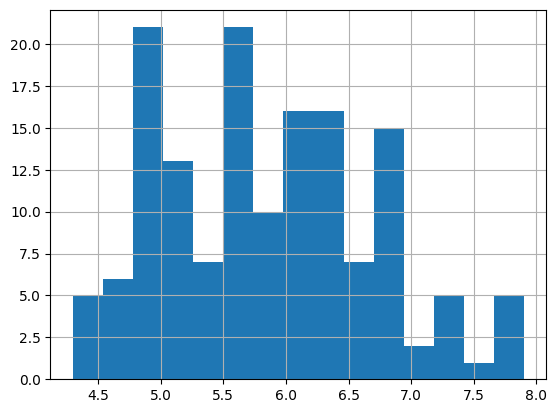

In [63]:
iris["sepal_length"].hist(bins=15);


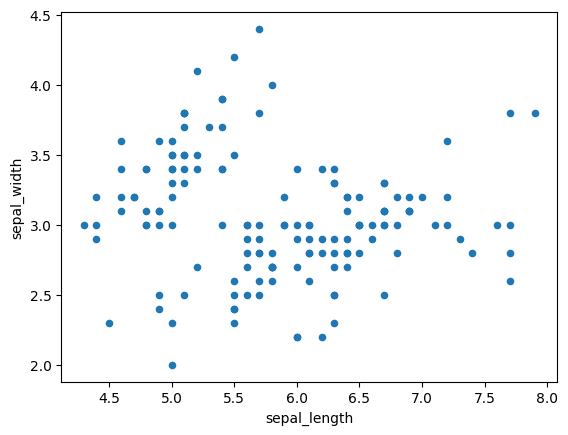

In [66]:
iris.plot.scatter(x="sepal_length", y="sepal_width");

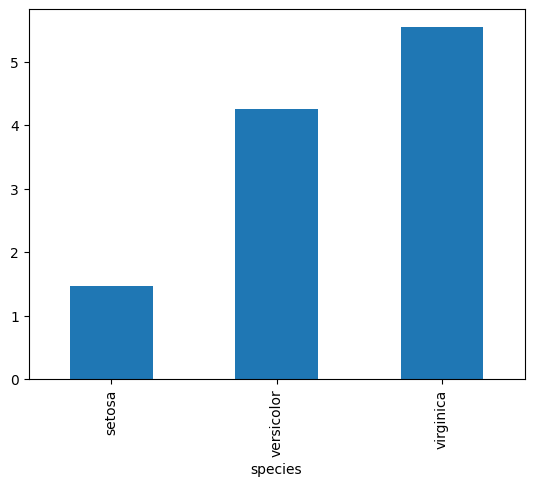

In [68]:
iris.groupby("species")["petal_length"].mean().plot(kind="bar");

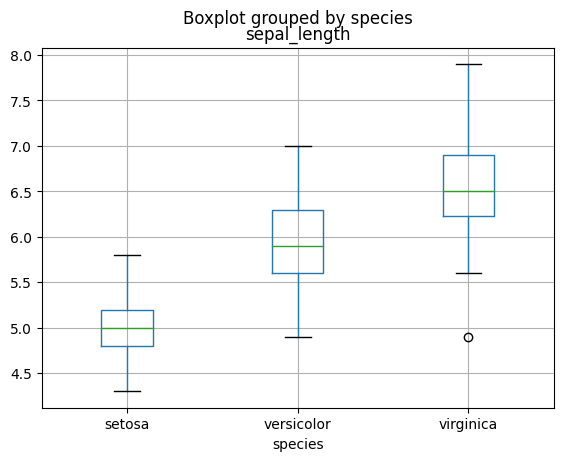

In [70]:
iris.boxplot(column="sepal_length", by="species");

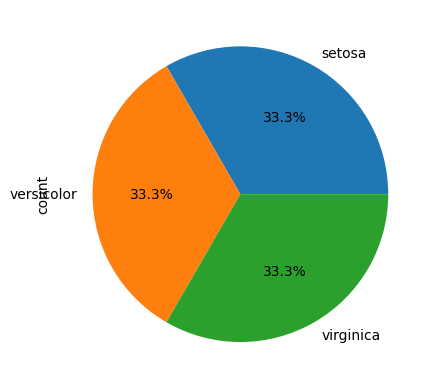

In [77]:
iris["species"].value_counts().plot(kind="pie", autopct="%1.1f%%");

#### Встроенные графики pandas основаны на библиотеке matplotlib, для их настройки можно пользоваться самим matplotlib. Для более сложных графиков лучше пользоваться matplotlib и seaborn